In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [31]:
df=pd.read_csv(r'E:\ML\EDA Datasets\netflix_titles.csv')

#### Top 5 Row

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Shape of the dataset

In [33]:
df.shape

(8807, 12)

#### Check for Null values

In [34]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [35]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

imputing Null values

In [36]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [74]:
df.drop(df.loc[df['rating'].isin(['74 min', '84 min', '66 min'])].index,inplace=True)

In [76]:
df['director'].fillna('NoDataAvalilable',inplace=True)
df['cast'].fillna('NoDataAvalilable',inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['duration'].fillna('NoDataAvalilable',inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [77]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### check for duplicate values

In [78]:
df.duplicated().sum()

0

#### 1. What is the type of movie created most

In [79]:
df['type'].value_counts()

Movie      6128
TV Show    2676
Name: type, dtype: int64

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

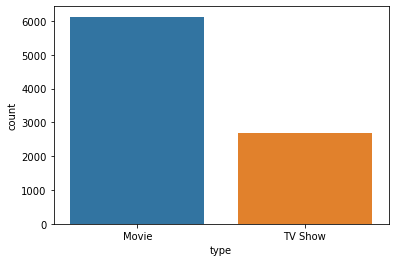

In [80]:
sns.countplot(df['type'])

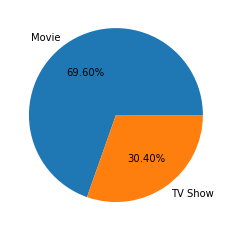

In [81]:
plt.pie(df['type'].value_counts(),labels=df['type'].unique(),autopct='%00.2f%%')
plt.show()

#### 2. Coutry having Highest number of Movies and TV-Shows

In [82]:
df['country'].value_counts().head(10)

United States     3646
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

<AxesSubplot:>

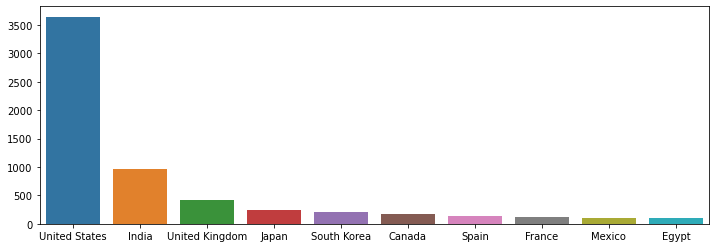

In [83]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['country'].value_counts().head(10).index,y=df['country'].value_counts().head(10).values)

#### top 10 countries having type = movie

In [84]:
df['country'][df['type']=='Movie'].value_counts()[:10]

United States     2495
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Turkey              76
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

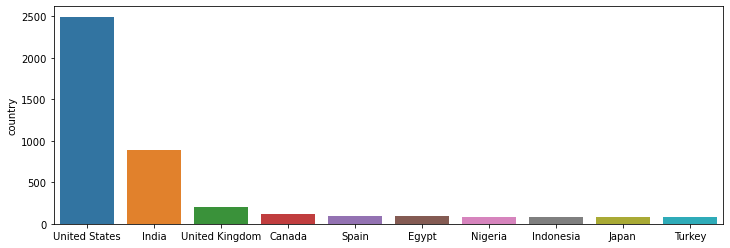

In [85]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['country'][df['type']=='Movie'].value_counts()[:10].index,y=df['country'][df['type']=='Movie'].value_counts()[:10])

#### top 10 countries having type = TV-show

In [86]:
df['country'][df['type']=='TV Show'].value_counts()[:10]

United States     1151
United Kingdom     213
Japan              169
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Spain               48
Australia           48
Name: country, dtype: int64

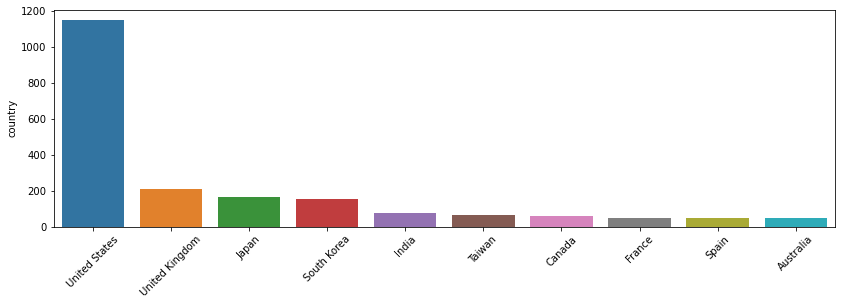

In [87]:
plt.figure(figsize=(14,4))
sns.barplot(x=df['country'][df['type']=='TV Show'].value_counts()[:10].index,y=df['country'][df['type']=='TV Show'].value_counts()[:10])
plt.xticks(rotation=45)
plt.show()

In [88]:
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [89]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvalilable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,s2,TV Show,Blood & Water,NoDataAvalilable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,s4,TV Show,Jailbirds New Orleans,NoDataAvalilable,NoDataAvalilable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,s5,TV Show,Kota Factory,NoDataAvalilable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults


#### Content Added Over years

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

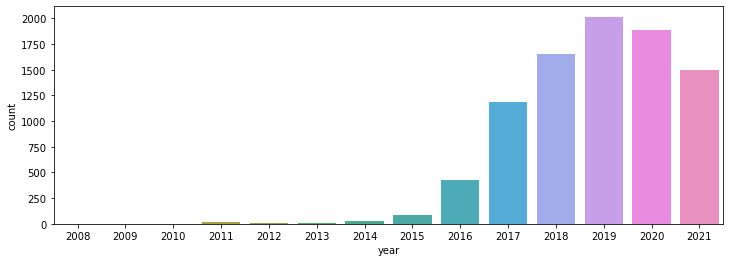

In [90]:
plt.figure(figsize=(12,4))
sns.countplot(df['year'])

#### Movies Added Over years

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

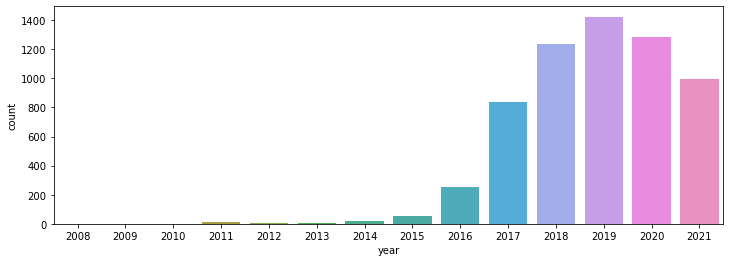

In [91]:
plt.figure(figsize=(12,4))
sns.countplot(df[df['type']=='Movie']['year'])

#### TV-show Added over years

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

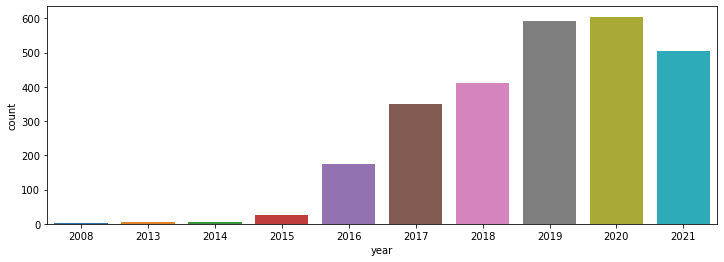

In [92]:
plt.figure(figsize=(12,4))
sns.countplot(df[df['type']=='TV Show']['year'])

#### Netflix shows to rating_ages

In [93]:
df['ratings_ages'].value_counts()

Adults        4096
Teens         2650
Older Kids    1490
Kids           568
Name: ratings_ages, dtype: int64

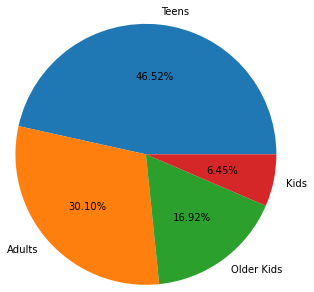

In [94]:
plt.pie(df['ratings_ages'].value_counts(),labels=df['ratings_ages'].unique(),autopct='%0.2f%%',radius=1.5)
plt.show()

#### Distribution of Movie acc to rating_age

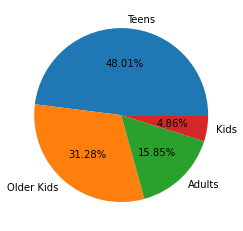

In [114]:
plt.pie(df['ratings_ages'][df['type']=='Movie'].value_counts(),labels=df['ratings_ages'][df['type']=='Movie'].unique(),autopct='%0.2f%%')
plt.show()

#### Distribution of TV Sho acc to rating_age

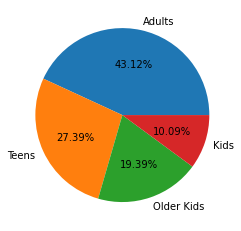

In [115]:
plt.pie(df['ratings_ages'][df['type']=='TV Show'].value_counts(),labels=df['ratings_ages'][df['type']=='TV Show'].unique(),autopct='%0.2f%%')
plt.show()

#### Top 10 year having most number of Movies and TV shows released 

In [100]:
df['release_year'].value_counts()[:10]

2018    1147
2017    1031
2019    1030
2020     953
2016     902
2021     592
2015     559
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

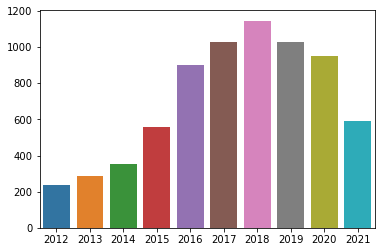

In [103]:
sns.barplot(df['release_year'].value_counts()[:10].index,df['release_year'].value_counts()[:10].values)